In [5]:
import pickle

with open('../outputs/2025-03-14/00-16-51=get_unet_states/unet_features/cur_inv/0.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [6]:
loaded_dict.keys()

dict_keys(['down_self', 'mid_self', 'up_self'])

In [7]:
print(len(loaded_dict['down_self']))
print(len(loaded_dict['mid_self']))
print(len(loaded_dict['up_self']))

6
1
9


In [10]:
loaded_dict['down_self'][0].size()

torch.Size([8, 4096, 4096])

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
import PIL
from PIL import Image

In [ ]:
# aggregate all heads
def visualize_self_attn(attention_matrix):
    n_heads, seq_len, seq_len = attention_matrix.shape
    image_size = int(math.sqrt(seq_len))
    attention_matrix = attention_matrix.permute(1, 0, 2).reshape(seq_len, -1)
    attention_matrix = attention_matrix.cpu().detach().numpy()
    pca = PCA(n_components=3)
    attn_img = pca.fit_transform(attention_matrix).reshape(image_size, image_size, 3)
    attn_img = (attn_img - attn_img.min()) / (attn_img.max() - attn_img.min())
    return Image.fromarray((attn_img * 255).astype(np.uint8))

(64, 64, 3)


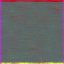

In [30]:
visualize_self_attn(loaded_dict['down_self'][0])